# **VADER Model Sentiment Analysis**

The vader model used in this tutorial notebook relies on the Bag of words.
Here is a video that explains the thoery of this "Bag or words" text model : https://www.youtube.com/watch?v=Yt1Sw6yWjlw (first 8 minutes)

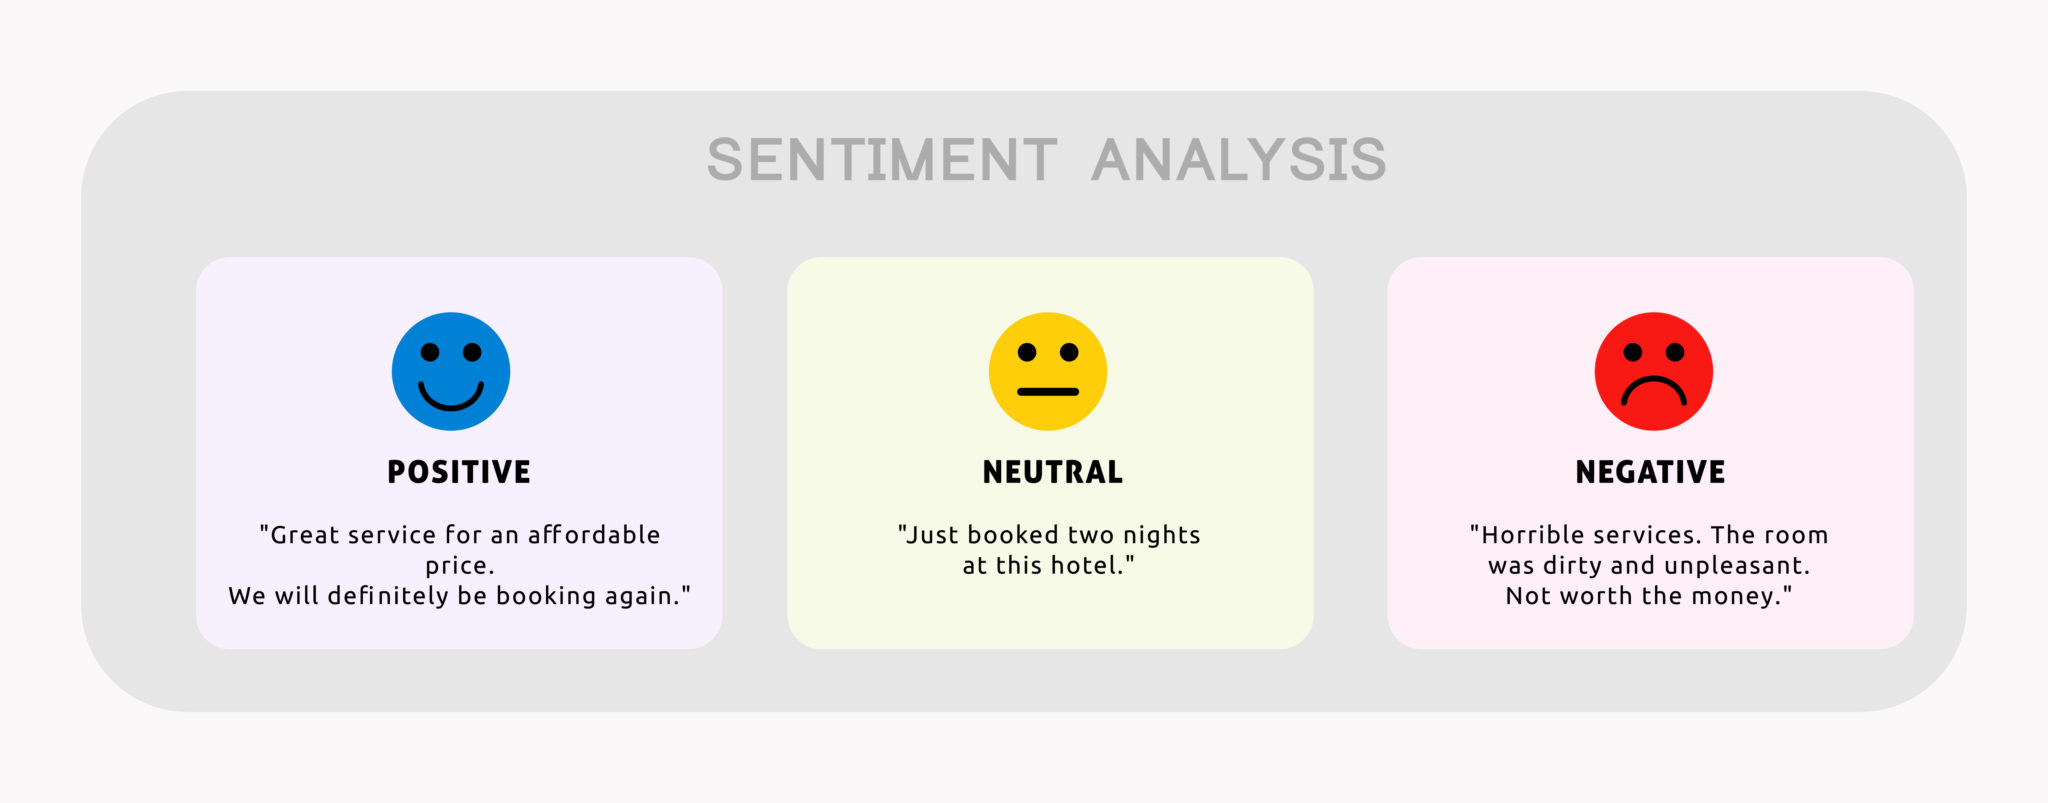

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt .style.use ('ggplot') #to mimic the aesthetics of the "ggplot" style from the R programming language's ggplot2 package.

In [3]:
#READ DATA - reviews file
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df = df.head(500)

In [4]:
df.shape

(500, 10)

**Exploratory Data Analysis (EDA)**

In [5]:
# count of reviews by Score
scores = df['Score'].value_counts().sort_index()
scores

Score
1     36
2     18
3     37
4     70
5    339
Name: count, dtype: int64

<Axes: title={'center': 'Reviews Count by Score'}, xlabel='Number of stars', ylabel='Total count'>

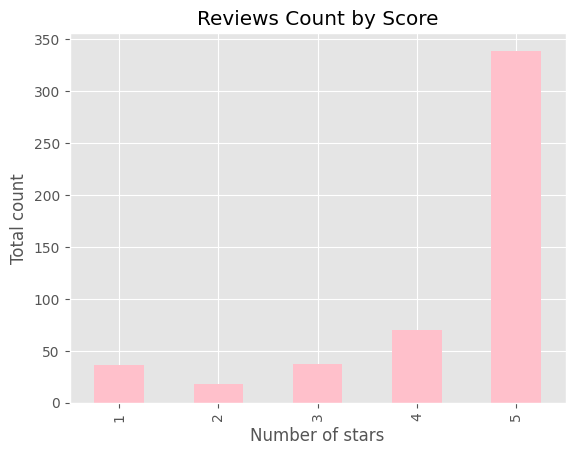

In [6]:
scores.plot(kind = 'bar', title='Reviews Count by Score', xlabel='Number of stars',ylabel='Total count', color='pink')

**Test NLTK on one review**

for a more detailed guide on how to use NLTK for sentiment analysis check this blog: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

In [7]:
import nltk
from nltk import Tree

In [8]:
#Tokenization
review_example = df['Text'][3]
review_example

'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.'

In [9]:
tokens = nltk.word_tokenize(review_example)
tokens[:8]

['If', 'you', 'are', 'looking', 'for', 'the', 'secret', 'ingredient']

before we dig into the part of speech tagging (POS), below is a list of all NLTK tags

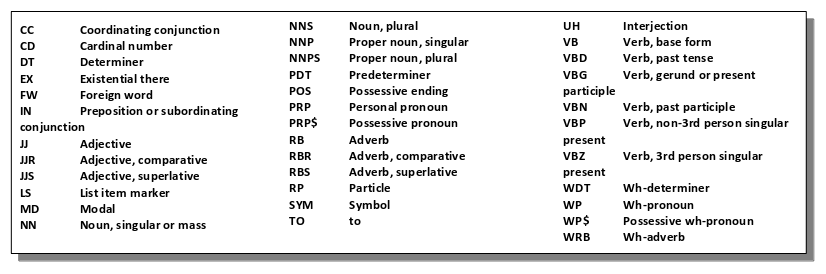

In [10]:
#Part of Speech Tagging
tagged = nltk.pos_tag(tokens)
tagged[:5]

[('If', 'IN'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('looking', 'VBG'),
 ('for', 'IN')]

In [11]:
#Named Entities
chunked = nltk.chunk.ne_chunk(tagged) #The ne_chunk() function processes the list of POS-tagged tokens (tagged) as input and produces a tree of named entities as output

# Function to recursively draw the chunk tree
def draw_chunk_tree(tree):
    if isinstance(tree, Tree):
        print(f"Chunk: {tree.label()}")
        for subtree in tree:
            if isinstance(subtree, Tree):
                draw_chunk_tree(subtree)
            else:
                print(f"  {subtree}")

# Display the chunk tree structure
draw_chunk_tree(chunked)

Chunk: S
  ('If', 'IN')
  ('you', 'PRP')
  ('are', 'VBP')
  ('looking', 'VBG')
  ('for', 'IN')
  ('the', 'DT')
  ('secret', 'JJ')
  ('ingredient', 'NN')
  ('in', 'IN')
  ('Robitussin', 'NNP')
  ('I', 'PRP')
  ('believe', 'VBP')
  ('I', 'PRP')
  ('have', 'VBP')
  ('found', 'VBN')
  ('it', 'PRP')
  ('.', '.')
  ('I', 'PRP')
  ('got', 'VBD')
  ('this', 'DT')
  ('in', 'IN')
  ('addition', 'NN')
  ('to', 'TO')
  ('the', 'DT')
Chunk: ORGANIZATION
  ('Root', 'NNP')
  ('Beer', 'NNP')
  ('Extract', 'NNP')
  ('I', 'PRP')
  ('ordered', 'VBD')
  ('(', '(')
  ('which', 'WDT')
  ('was', 'VBD')
  ('good', 'JJ')
  (')', ')')
  ('and', 'CC')
  ('made', 'VBD')
  ('some', 'DT')
  ('cherry', 'JJ')
  ('soda', 'NN')
  ('.', '.')
  ('The', 'DT')
  ('flavor', 'NN')
  ('is', 'VBZ')
  ('very', 'RB')
  ('medicinal', 'JJ')
  ('.', '.')


**VADER Model**

In [12]:
# import libraries
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
print(review_example)
sia.polarity_scores(review_example)

If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [14]:
#itterate over all the raw
result = {}
for i,row in df.iterrows():
    text = row['Text']
    row_id = row['Id']
    #store the polarity score in the result dictionnary
    result[row_id] = sia.polarity_scores(text)

In [15]:
#store the results in a dataframe
vaders = pd.DataFrame(result).T
#merge the vaders dataframe with the initial dataset
vaders = vaders.reset_index().rename(columns = {'index':'Id'}) #make a common column 'Id' before merging 
vaders = vaders.merge(df, how='right')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


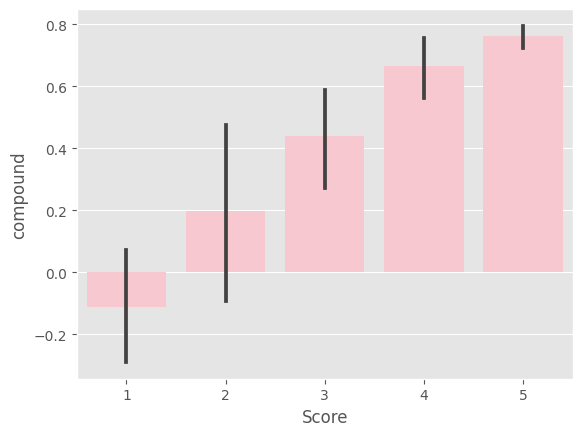

In [24]:
#plot the results using a barplot
bar_plot = sns.barplot(data=vaders,x='Score',y='compound',color='pink') #show the colloration between the scores and the the compound score

Text(0.5, 1.0, 'Neutral')

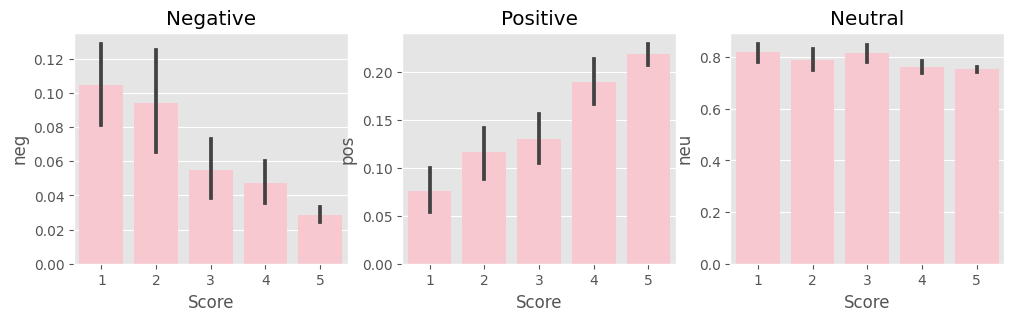

In [28]:
#plot the results for each individual score "neu", "pos", and "neg"
fig, axs = plt.subplots(1,3,figsize = (12,3))
sns.barplot(data= vaders, x = 'Score',y='neg',color= 'pink', ax=axs[0])
sns.barplot(data= vaders, x = 'Score',y='pos',color= 'pink',ax=axs[1])
sns.barplot(data= vaders, x = 'Score',y='neu',color= 'pink',ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Positive')
axs[2].set_title('Neutral')